In [1]:
# Importing the pandas library
import pandas as pd

In [2]:
#read the dataset using pandas.
df=pd.read_csv(r'C:\Users\Ramachandraiah\Downloads\billboard.csv')
df

,Rank,Song Name,Singer,Last Week,Peak Position,Weeks on Chart
0,1,Like That,"Future, Metro Boomin & Kendrick Lamar",1,1,2
1,2,Texas Hold 'Em,Beyonce,11,1,8
2,3,Beautiful Things,Benson Boone,3,2,11
3,4,Too Sweet,Hozier,5,4,2
4,5,Lose Control,Teddy Swims,4,1,34
...,...,...,...,...,...,...
95,96,Everyday Hustle,"Future, Metro Boomin & Rick Ross",38,38,2
96,97,Back Then Right Now,Tyler Hubbard,-,83,3
97,98,La People II,"Peso Pluma, Tito Double P & Joel de La P",69,69,2
98,99,Home,Good Neighbours,95,77,9


In [3]:
# Observing the first five records.
df.head()

,Rank,Song Name,Singer,Last Week,Peak Position,Weeks on Chart
0,1,Like That,"Future, Metro Boomin & Kendrick Lamar",1,1,2
1,2,Texas Hold 'Em,Beyonce,11,1,8
2,3,Beautiful Things,Benson Boone,3,2,11
3,4,Too Sweet,Hozier,5,4,2
4,5,Lose Control,Teddy Swims,4,1,34


# Get the stopwords

In [4]:
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"needn't", 'doing', 'each', 'yours', 'ma', 'then', 'his', 'over', 'yourselves', 'same', 'aren', 'he', 'mustn', 'through', 'few', 'below', 'any', 'about', 'they', 'on', 'during', 'such', 'them', 'its', 'shan', 'am', 'are', 'for', 's', 'with', "hadn't", 'himself', 'these', 'o', 'needn', 'i', 'wouldn', "shan't", 'down', 'when', 'a', 'which', 'nor', 'until', 'off', 'couldn', 'before', "you'd", 'my', 'once', 'weren', 'it', 'whom', 'how', 'isn', 'own', 'only', "should've", 've', 'what', 'at', 'been', "weren't", 'to', 'had', 'again', 'ours', 'who', 'shouldn', 'won', 'out', 'that', 'too', 'theirs', 'herself', 'their', "aren't", 'not', 'hadn', 'because', 'have', 'do', 'into', 't', 'mightn', 'can', 'wasn', "couldn't", 'here', 'she', 'up', 'in', 'some', 'does', 'most', 'more', "don't", 'was', 'having', 'our', 'those', 'just', 'm', 'ain', 'your', 'where', 'if', 'but', 'ourselves', "mightn't", 'you', 'will', "hasn't", "it's", 'between', 'hasn', 'is', "you'll", 'y', 'don', 'the', 'now', 'from', 'my

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramachandraiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Pre-processing pipeline

In [5]:
# Cleaning the text by performing tokenization, removing the stopwords and preprocessing the text.
import regex as re

def tokenize(song_name):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', song_name)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(song_name, pipeline):
    tokens = song_name
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['Song Name'].apply(prepare, pipeline=pipeline)

# Now count the tokens

In [6]:
# Counting the frequency of the tokens
from collections import Counter

# Assuming df is already defined
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame(counter.items(), columns=['token', 'freq'])
freq_df = freq_df[freq_df['freq'] >= 1]  # Filtering frequencies >= 1
freq_df = freq_df.sort_values(by='freq', ascending=False)
freq_df.set_index('token', inplace=True)
freq_df.head(10)

,freq
token,
ii,5
wild,3
like,2
lose,2
ya,2
get,2
season,2
made,2
sweet,2


In [7]:
freq_df['freq']

token
ii           5
wild         3
like         2
lose         2
ya           2
            ..
act          1
date         1
daughter     1
carriages    1
late         1
Name: freq, Length: 152, dtype: int64

In [8]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


# draw the word cloud

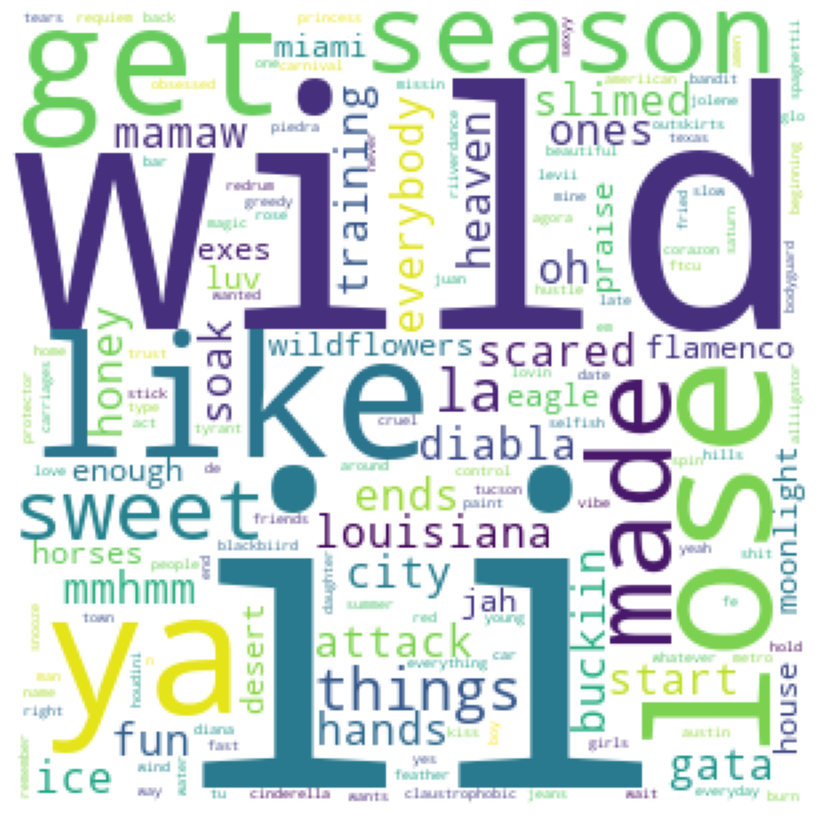

In [9]:
# displays a word cloud visualization from a DataFrame of word frequencies using the WordCloud library and Matplotlib.
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Now let’s do the TFIDF and compare

In [10]:
# Finding the document frequency and then inverse document frequency
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [11]:
idf_df['idf']

token
like         4.012023
texas        4.705170
hold         4.705170
em           4.705170
beautiful    4.705170
               ...   
right        4.705170
people       4.705170
home         4.705170
tucson       4.705170
late         4.705170
Name: idf, Length: 152, dtype: float64

In [12]:
# Multiplying the term frequency and inverse document frequency
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
ii,5,16.594379
wild,3,10.819674
like,2,8.024046
lose,2,8.024046
ya,2,9.410340


# Let’s draw the word cloud

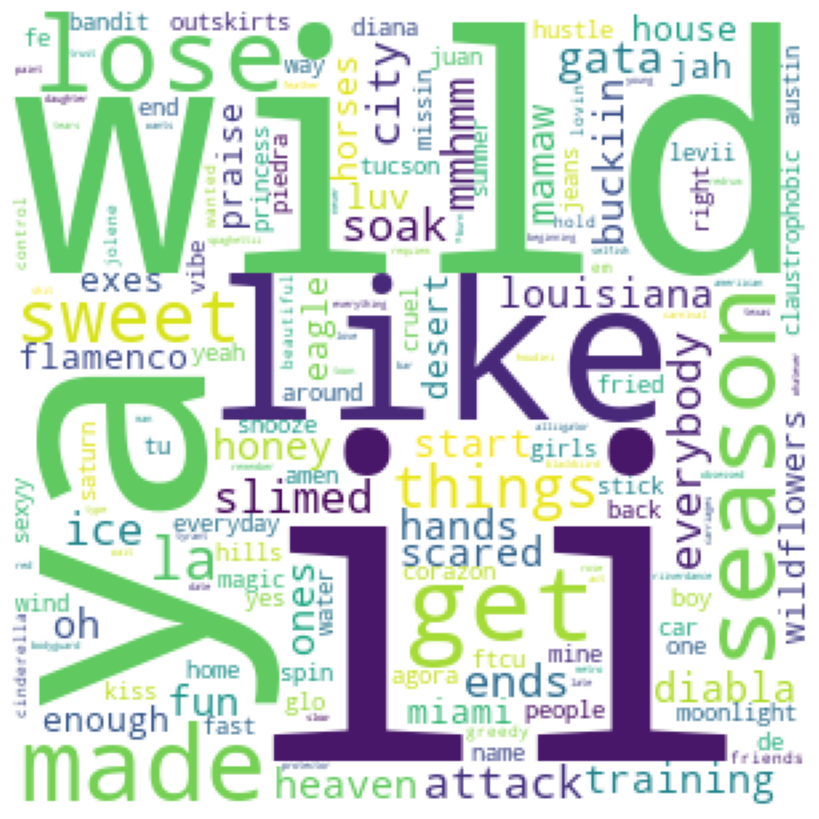

In [13]:
# displays a word cloud visualization from a DataFrame of product of term frequency and the inverse document frequency using the WordCloud library and Matplotlib.
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count the keywords

In [14]:
# calculates the count of specific keywords within a list of tokens and returns a list of counts corresponding to each keyword.
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Function to group by year

In [15]:
#count_keywords_by function calculates the sum of keyword counts grouped by a specified column in the DataFrame.
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Draw!

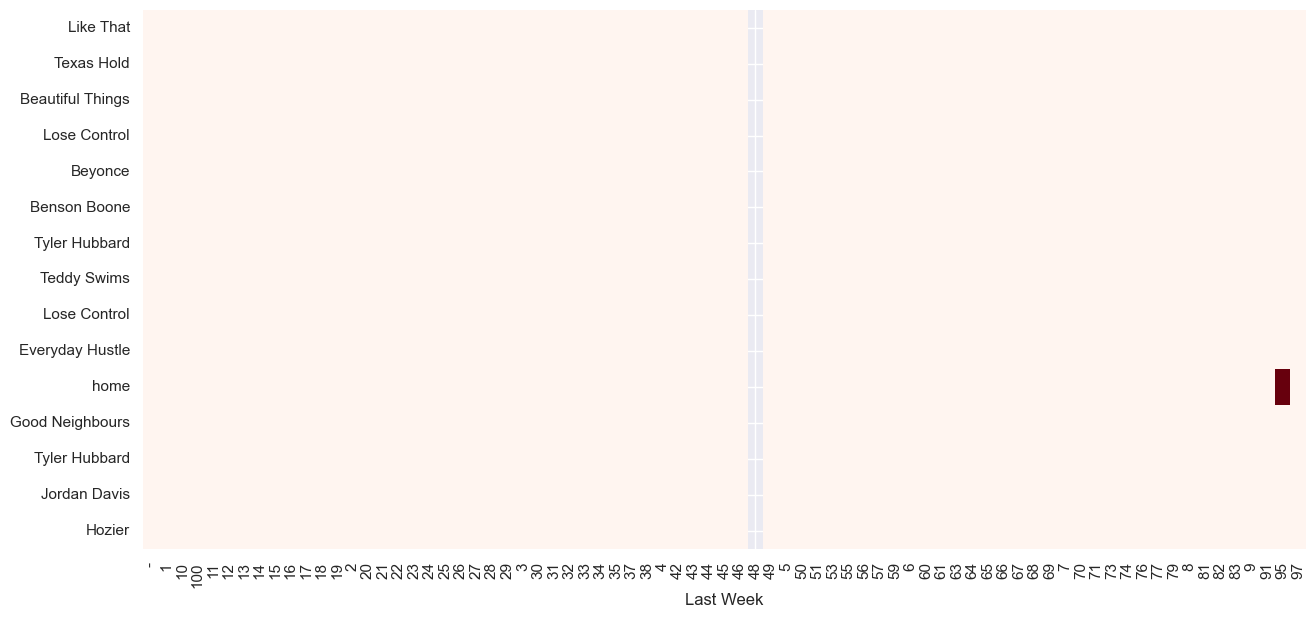

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def count_keywords(text, keywords):
    if isinstance(text, list):  # Check if the input is a list
        text = ' '.join(text)  # Convert the list of tokens back to a string
    return [text.lower().count(keyword) for keyword in keywords]

def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)  # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]  # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

# visualizes the relative frequency of specific keywords over years using a heatmap with seaborn.
keywords = ['Like That', 'Texas Hold', 'Beautiful Things', 'Lose Control',
            'Beyonce', 'Benson Boone', 'Tyler Hubbard', 'Teddy Swims', 'Lose Control', 
            'Everyday Hustle', 'home', 'Good Neighbours', 'Tyler Hubbard', 'Jordan Davis', 'Hozier']

freq_df = count_keywords_by(df, by='Last Week', keywords=keywords)  # Assuming the column name is 'Year' (case-sensitive)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('Last Week')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)

plt.show()